In [268]:
## Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [269]:
dataset = pd.read_csv('game_info_cleaned.csv')

In [270]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17517 entries, 0 to 17516
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            17517 non-null  object 
 1   Genre            17517 non-null  object 
 2   Console          17517 non-null  object 
 3   Publisher        17517 non-null  object 
 4   Total Sales (m)  17517 non-null  float64
 5   NA Sales (m)     17517 non-null  float64
 6   EU Sales (m)     17517 non-null  float64
 7   JP Sales (m)     17517 non-null  float64
 8   Other Sales (m)  17517 non-null  float64
 9   Release Month    17517 non-null  int64  
 10  Release Year     17517 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [271]:
dataset.head(10)

,Title,Genre,Console,Publisher,Total Sales (m),NA Sales (m),EU Sales (m),JP Sales (m),Other Sales (m),Release Month,Release Year
0,Tomb Raider II,Adventure,PS,Eidos Interactive,5.24,2.30,2.46,0.20,0.28,10,1997
1,LEGO Indiana Jones: The Original Adventures,Adventure,X360,LucasArts,3.76,2.40,1.01,0.00,0.36,6,2008
2,Tomb Raider III: Adventures of Lara Croft,Adventure,PS,Eidos Interactive,3.54,1.66,1.58,0.12,0.18,11,1998
3,LEGO Batman: The Videogame,Adventure,X360,Warner Bros. Interactive,3.44,2.07,1.04,0.00,0.34,9,2008
4,L.A. Noire,Adventure,PS3,Rockstar Games,3.21,1.29,1.31,0.12,0.49,11,2011
5,Club Penguin: Elite Penguin Force,Adventure,DS,Disney Interactive Studios,3.14,1.87,0.97,0.00,0.30,11,2008
6,LEGO Batman: The Videogame,Adventure,Wii,Warner Bros. Interactive,3.08,1.80,0.98,0.00,0.29,9,2008
7,LEGO Batman: The Videogame,Adventure,DS,Warner Bros. Interactive,3.06,1.75,1.02,0.00,0.29,9,2008
8,L.A. Noire,Adventure,X360,Rockstar Games,2.73,1.55,0.92,0.02,0.24,11,2011
9,Harry Potter and the Chamber of Secrets,Adventure,PS2,Electronic Arts,2.61,0.90,1.22,0.04,0.44,11,2002


In [272]:
dataset.isnull().values.any()

False

In [273]:
## Defining the features and the dependent variable
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,4].values
print(x[0])
print(y)

['Adventure' 'PS' 'Eidos Interactive' 5.24 2.3 2.46 0.2 0.28 10]
[5.24 3.76 3.54 ... 0.01 0.01 0.01]


In [274]:
# Retaining only the useful features of the dataset
# From the heatmap, we can decipher that the columns NA_Sales,JP_Sales,EU_Sales and Other_Sales are the most useful features
# in determining the global sales
x = dataset.iloc[:,5:-3].values
print(x[0])

[2.3  2.46 0.2 ]


In [275]:
## Splitting the dataset into independent and dependent vaiables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [276]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[0.65 0.44 0.  ]
 [0.08 0.   0.  ]
 [0.24 0.22 0.  ]
 ...
 [0.09 0.01 0.  ]
 [0.12 0.09 0.  ]
 [0.   0.   0.23]]
[[0.05 0.01 0.  ]
 [0.   0.   0.29]
 [0.   0.   0.02]
 ...
 [0.41 0.   0.  ]
 [0.1  0.04 0.04]
 [0.16 0.06 0.  ]]
[1.17 0.09 0.55 ... 0.1  0.25 0.23]
[0.06 0.29 0.02 ... 0.44 0.19 0.22]


In [277]:
## Training the multiple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor_MultiLinear = LinearRegression()
regressor_MultiLinear.fit(x_train,y_train)

LinearRegression()

In [278]:
## Predicting test results
y_pred = regressor_MultiLinear.predict(x_test)

In [279]:
# Calculating r2 score
from sklearn.metrics import r2_score
r2_MultiLinear = r2_score(y_test,y_pred)
print(r2_MultiLinear)

0.9941822589562178


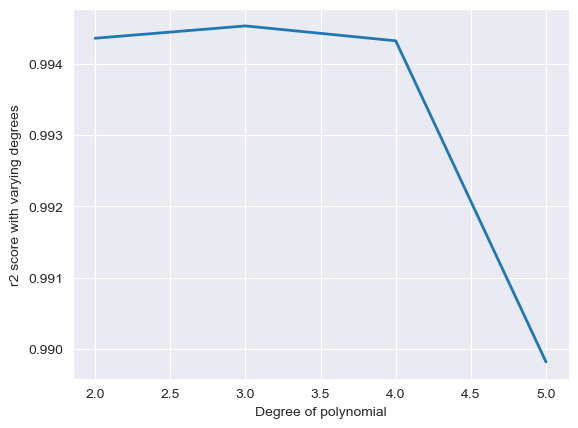

In [280]:
## Finding out the optimal degree of polynomial regression
from sklearn.preprocessing import PolynomialFeatures
sns.set_style('darkgrid')
scores_list = []
pRange = range(2,6)
for i in pRange :
    poly_reg = PolynomialFeatures(degree=i)
    x_poly = poly_reg.fit_transform(x_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(x_poly,y_train)
    y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(pRange,scores_list,linewidth=2)
plt.xlabel('Degree of polynomial')
plt.ylabel('r2 score with varying degrees')
plt.show()

In [281]:
## Training the polynomial regression on the training model
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly,y_train)
y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
r2_poly = r2_score(y_test,y_pred)
print(r2_poly)

0.9943588140643689


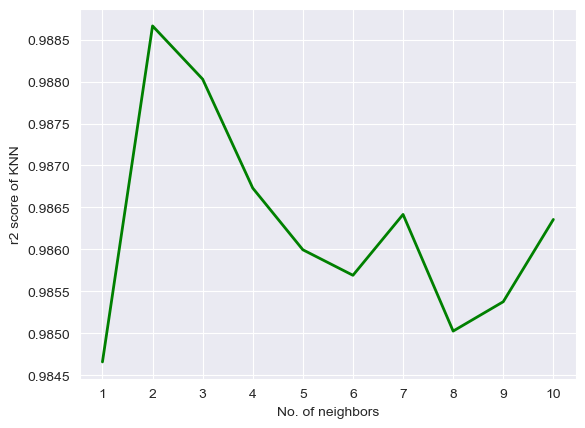

In [282]:
## Finding the optimal number of neighbors for KNN regression
from sklearn.neighbors import KNeighborsRegressor
knnRange = range(1,11,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(x_train,y_train)
    y_pred = regressor_knn.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()   

In [283]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors=7)
regressor_knn.fit(x_train,y_train)
y_pred = regressor_knn.predict(x_test)
r2_knn = r2_score(y_test,y_pred)
print(r2_knn)

0.9864164507931569


In [284]:
# Training the Decision Tree regression on the training model
from sklearn.tree import DecisionTreeRegressor
regressor_Tree = DecisionTreeRegressor(random_state=0)
regressor_Tree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [285]:
# Predicting test results
y_pred = regressor_Tree.predict(x_test)

In [286]:
# Calculating r2 score
r2_tree = r2_score(y_test,y_pred)
print(r2_tree)

0.979696357763134


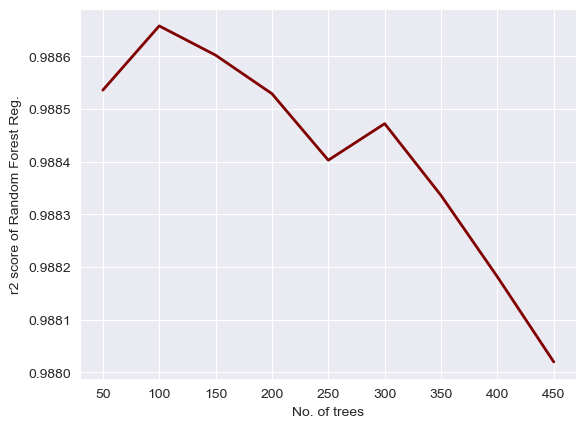

In [287]:
# Finding out the optimal number of trees for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    regressor_Forest = RandomForestRegressor(n_estimators=i,random_state=0)
    regressor_Forest.fit(x_train,y_train)
    y_pred = regressor_Forest.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()    

In [288]:
# Training the Random Forest regression on the training model
regressor_Forest = RandomForestRegressor(n_estimators=100,random_state=0)
regressor_Forest.fit(x_train,y_train)
y_pred = regressor_Forest.predict(x_test)
r2_forest = r2_score(y_test,y_pred)
print(r2_forest)

0.9886576381961036


In [289]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.reshape(y_train,(len(y_train),1)))
y_test = sc_y.transform(np.reshape(y_test,(len(y_test),1)))

In [290]:
print(x_train)
print(x_test)
print(y_test)
print(y_train)

[[ 1.05647557  0.9579429  -0.33740954]
 [-0.25064821 -0.3152587  -0.33740954]
 [ 0.11626373  0.3213421  -0.33740954]
 ...
 [-0.22771621 -0.2863223  -0.33740954]
 [-0.15892022 -0.0548311  -0.33740954]
 [-0.43410418 -0.3152587   1.61980508]]
[[-0.3194442  -0.2863223  -0.33740954]
 [-0.43410418 -0.3152587   2.1303828 ]
 [-0.43410418 -0.3152587  -0.16721697]
 ...
 [ 0.50610767 -0.3152587  -0.33740954]
 [-0.20478422 -0.1995131   0.00297561]
 [-0.06719224 -0.1416403  -0.33740954]]
[[-0.37601068]
 [-0.10175987]
 [-0.42370648]
 ...
 [ 0.07709935]
 [-0.22099936]
 [-0.18522751]]
[[ 0.94754757]
 [-0.34023884]
 [ 0.20826278]
 ...
 [-0.32831489]
 [-0.14945567]
 [-0.17330356]]


In [291]:
## Training the Linear SVR model on the training set
from sklearn.svm import SVR
regressor_SVR = SVR(kernel='linear')
regressor_SVR.fit(x_train,y_train)

SVR(kernel='linear')

In [292]:
## Predicting test results
y_pred = regressor_SVR.predict(x_test)

In [293]:
## Calculating r2 score
r2_linearSVR = r2_score(y_test,y_pred)
print(r2_linearSVR)

0.9938479532305985


In [294]:
## Training the Non-linear SVR model on the training set
from sklearn.svm import SVR
regressor_NonLinearSVR = SVR(kernel='rbf')
regressor_NonLinearSVR.fit(x_train,y_train)

SVR()

In [295]:
## Predicting test results
y_pred = regressor_NonLinearSVR.predict(x_test)

In [296]:
## Calculating r2 score
r2_NonlinearSVR = r2_score(y_test,y_pred)
print(r2_NonlinearSVR)

0.8148833205186696


In [297]:
## Applying XGBoost Regression model on the training set
!pip install xgboost
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [298]:
## Predicting test results
y_pred = regressor_xgb.predict(x_test)

In [299]:
## Calculating r2 score
r2_xgb = r2_score(y_test,y_pred)
print(r2_xgb)

0.9781190911111172


In [300]:
## Comparing the r2 scores of different models
labelList = ['Multiple Linear Reg.','Polynomial Reg.','K-NearestNeighbors','Decision Tree','Random Forest',
             'Linear SVR','Non-Linear SVR','XGBoost Reg.']
mylist = [r2_MultiLinear,r2_poly,r2_knn,r2_tree,r2_forest,r2_linearSVR,r2_NonlinearSVR,r2_xgb]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=3)
print(mylist)

[99.418, 99.436, 98.642, 97.97, 98.866, 99.385, 81.488, 97.812]


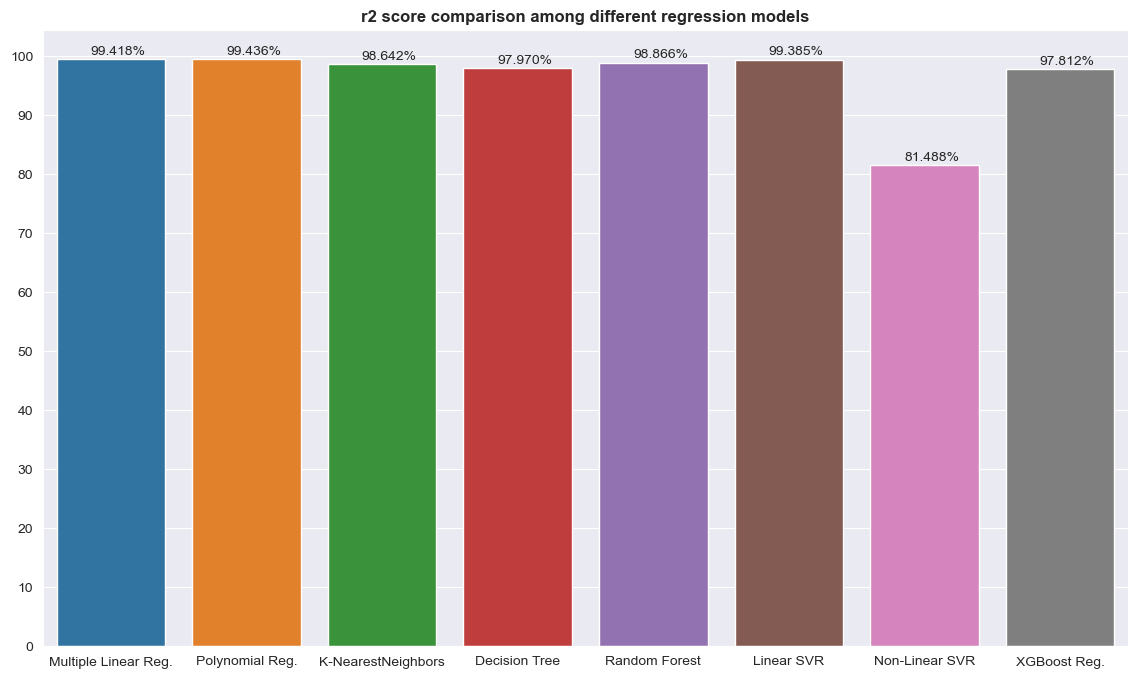

In [301]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()